https://docs.opencv22.org/4.x/dc/dc3/tutorial_py_matcher.html

# Brute-Force Matching with ORB Descriptors

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
queryImage = 'cv_cover.jpg'
trainImage = 'cv_desk.png'
img1 = cv2.imread(queryImage, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(trainImage, cv2.IMREAD_GRAYSCALE)


def get_matches(img1, img2):
    # Initiate ORB detector
    orb = cv2.ORB_create()
    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    # Create `BFMatcher`` object
    # For binary string based descriptors like ORB, BRIEF, BRISK etc, `cv.NORM_HAMMING`` should be used, which used Hamming distance as measurement
    # `crossCheck`: If it is `True`, Matcher returns only those matches with value (i, j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa. That is, the two features in both sets should match each other.
    bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1, des2)

    # Sort them in the order of their distances.
    matches = sorted(matches, key=lambda x: x.distance)
    return kp1, kp2, matches


kp1, kp2, matches = get_matches(img1=img1, img2=img2)

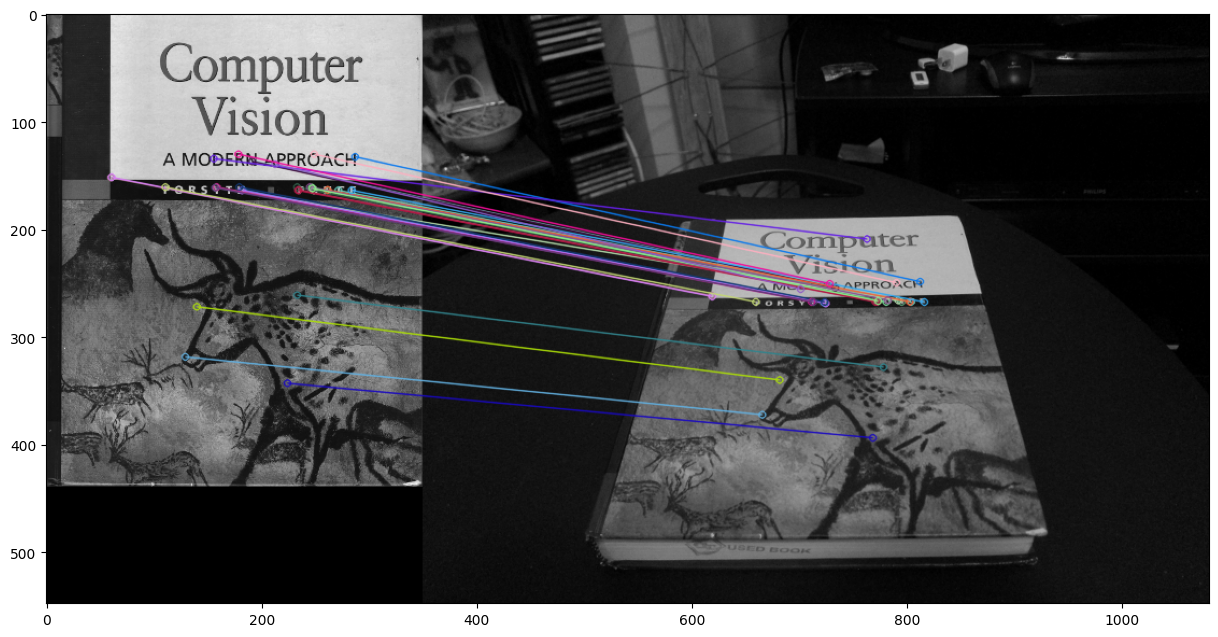

In [13]:
img3 = cv2.drawMatches(
    img1=img1,
    keypoints1=kp1,
    img2=img2,
    keypoints2=kp2,
    matches1to2=matches[: 30],
    outImg=None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()

### Additional part: Find homography and warping

In [9]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv.findHomography(points1, points2, cv.RANSAC)

height, width = img2.shape

im1_warped = cv.warpPerspective(img1, h, (width, height))

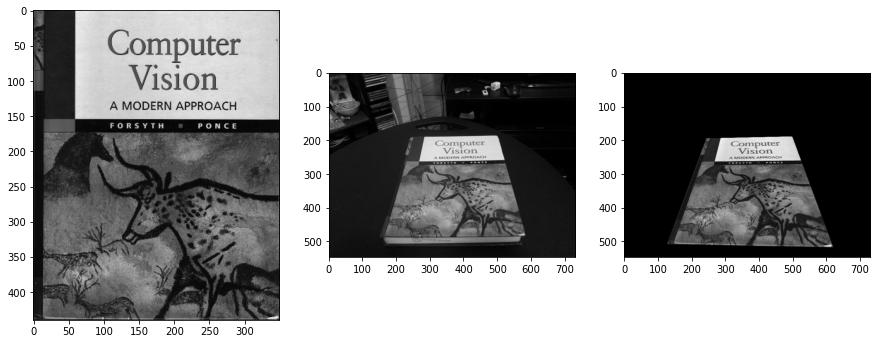

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im1_warped, cmap='gray')
plt.show()

### Extension: Brute-Force Matching with SIFT Descriptors and Ratio Test

This time, we will use BFMatcher.knnMatch() to get k best matches. In this example, we will take k=2 so that we can apply ratio test explained by D.Lowe in his paper.

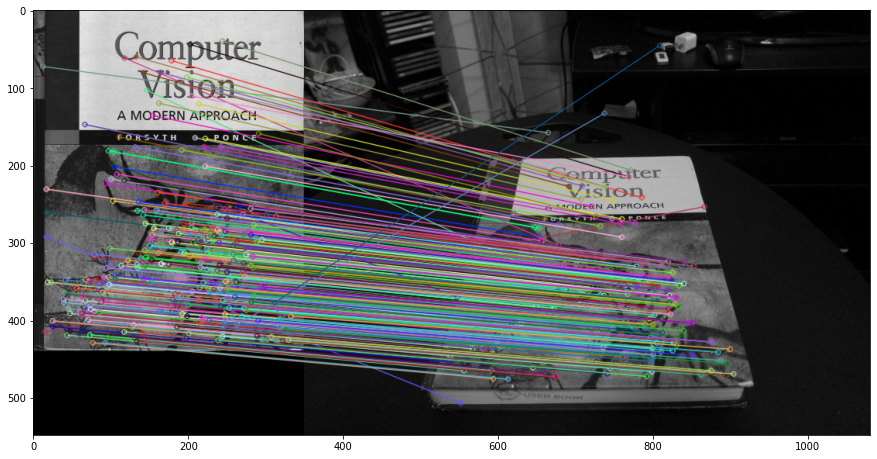

In [12]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()